In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('fandango_scrape.csv')

In [3]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
df.dtypes

FILM       object
STARS     float64
RATING    float64
VOTES       int64
dtype: object

In [5]:
df.isnull().sum()

FILM      0
STARS     0
RATING    0
VOTES     0
dtype: int64

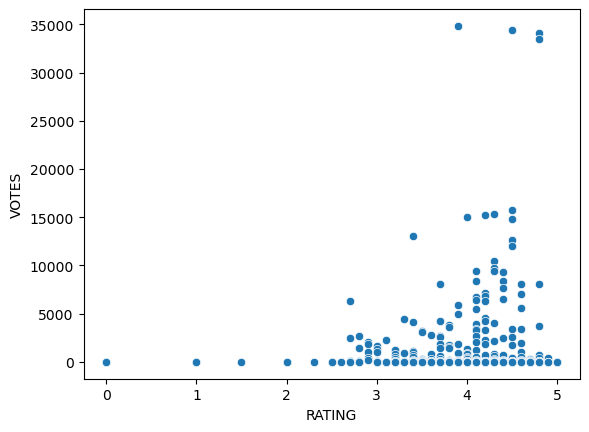

In [6]:
sns.scatterplot(data=df,x='RATING',y='VOTES');

In [7]:
df.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
df['YEAR'] = df['FILM'].str.extract(r'\((\d{4})\)')

In [9]:
df['FILM']=df['FILM'].str.extract(r'^(.*?)\s\(\d{4}\)')

In [10]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey,4.0,3.9,34846,2015
1,Jurassic World,4.5,4.5,34390,2015
2,American Sniper,5.0,4.8,34085,2015
3,Furious 7,5.0,4.8,33538,2015
4,Inside Out,4.5,4.5,15749,2015


In [11]:
df['YEAR'].value_counts()

YEAR
2015    477
2014     24
2016      1
1964      1
2012      1
Name: count, dtype: int64

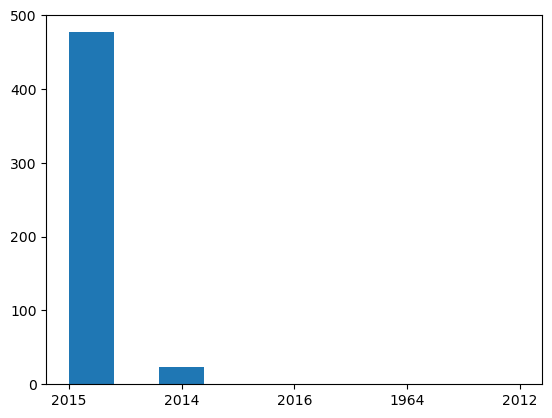

In [12]:
plt.hist(df['YEAR']);

In [13]:
df.sort_values(by='VOTES', ascending=False)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey,4.0,3.9,34846,2015
1,Jurassic World,4.5,4.5,34390,2015
2,American Sniper,5.0,4.8,34085,2015
3,Furious 7,5.0,4.8,33538,2015
4,Inside Out,4.5,4.5,15749,2015
...,...,...,...,...,...
463,La leon,0.0,0.0,0,2015
464,La passion d'Augustine,0.0,0.0,0,2015
465,Le gaucher,0.0,0.0,0,2015
466,Le monde de demain,0.0,0.0,0,2015


In [14]:
df.sort_values(by='VOTES', ascending=True)

,FILM,STARS,RATING,VOTES,YEAR
503,Zarafa,0.0,0.0,0,2012
465,Le gaucher,0.0,0.0,0,2015
464,La passion d'Augustine,0.0,0.0,0,2015
463,La leon,0.0,0.0,0,2015
462,La face cache de Margo,0.0,0.0,0,2015
...,...,...,...,...,...
4,Inside Out,4.5,4.5,15749,2015
3,Furious 7,5.0,4.8,33538,2015
2,American Sniper,5.0,4.8,34085,2015
1,Jurassic World,4.5,4.5,34390,2015


In [15]:
len(df[df['VOTES'] == 0])

69

In [16]:
drop_index = df[df['VOTES'] == 0].index

In [17]:
drop_index

Index([435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
       449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
       463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503],
      dtype='int64')

In [18]:
df = df.drop(index= drop_index)

In [19]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey,4.0,3.9,34846,2015
1,Jurassic World,4.5,4.5,34390,2015
2,American Sniper,5.0,4.8,34085,2015
3,Furious 7,5.0,4.8,33538,2015
4,Inside Out,4.5,4.5,15749,2015


In [20]:
df[df['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR


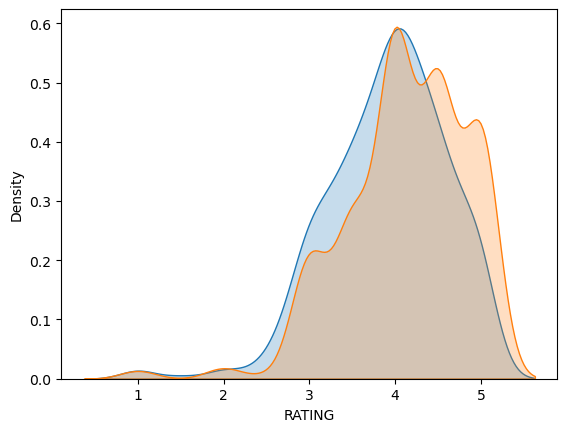

In [21]:
sns.kdeplot(data=df,x='RATING',fill=True)
sns.kdeplot(data=df,x='STARS',fill=True);

In [22]:
df['STAR_DIFF']=df['STARS']-df['RATING']

In [23]:
df['STAR_DIFF']=df['STAR_DIFF'].round(2)

In [24]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
0,Fifty Shades of Grey,4.0,3.9,34846,2015,0.1
1,Jurassic World,4.5,4.5,34390,2015,0.0
2,American Sniper,5.0,4.8,34085,2015,0.2
3,Furious 7,5.0,4.8,33538,2015,0.2
4,Inside Out,4.5,4.5,15749,2015,0.0


In [25]:
df['STAR_DIFF'].unique()

array([0.1, 0. , 0.2, 0.3, 0.5, 0.4, 1. ])

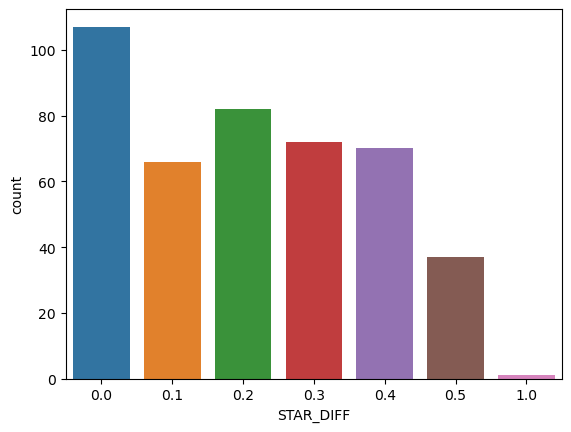

In [26]:
sns.countplot(data=df,x='STAR_DIFF');

In [27]:
df[df['STAR_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
381,Turbo Kid,5.0,4.0,2,2015,1.0


In [28]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
0,Fifty Shades of Grey,4.0,3.9,34846,2015,0.1
1,Jurassic World,4.5,4.5,34390,2015,0.0
2,American Sniper,5.0,4.8,34085,2015,0.2
3,Furious 7,5.0,4.8,33538,2015,0.2
4,Inside Out,4.5,4.5,15749,2015,0.0


In [29]:
sites=pd.read_csv('all_sites_scores.csv')

In [30]:
sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [31]:
sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [32]:
sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [33]:
sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


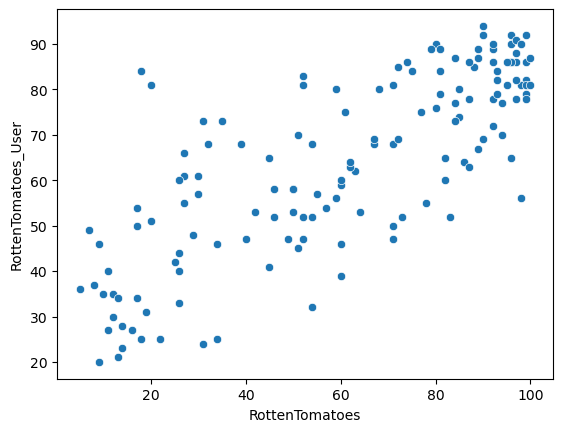

In [34]:
sns.scatterplot(data=sites,x='RottenTomatoes',y='RottenTomatoes_User');

In [35]:
sites['RT_diff']=sites['RottenTomatoes']-sites['RottenTomatoes_User']

In [36]:
sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [37]:
error=np.abs(sites['RottenTomatoes']-sites['RottenTomatoes_User'])

In [38]:
error.mean()

15.095890410958905

C:\Users\GREESHMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


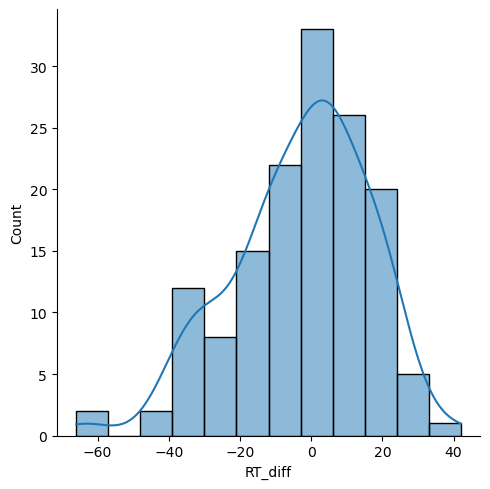

In [39]:
sns.displot(data=sites,x='RT_diff',kind='hist',kde=True);

<Axes: ylabel='Count'>

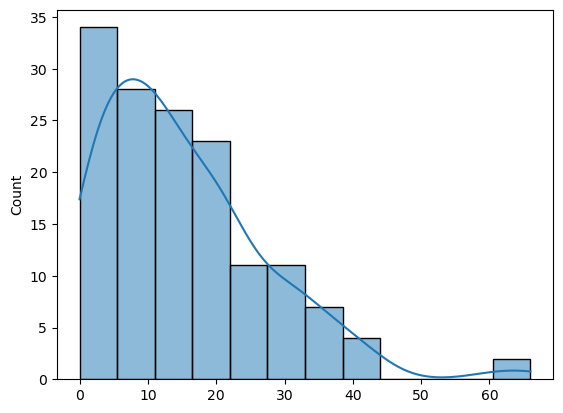

In [40]:
sns.histplot(data=sites,x=error,kde=True)

In [41]:
sites.sort_values(by='RT_diff', ascending=True)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39
...,...,...,...,...,...,...,...,...,...
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31


In [42]:
sites.sort_values(by='RT_diff', ascending=False)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
...,...,...,...,...,...,...,...,...,...
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61


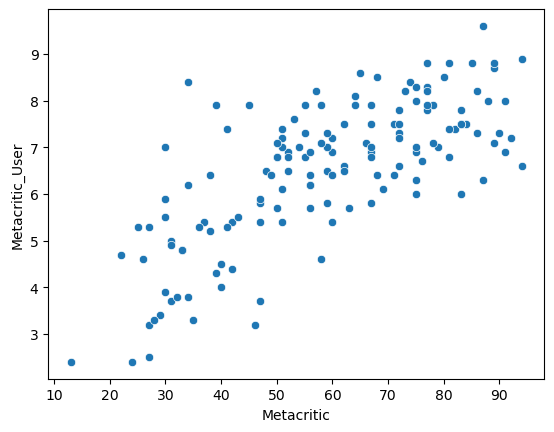

In [43]:
sns.scatterplot(data=sites,y='Metacritic_User',x='Metacritic');

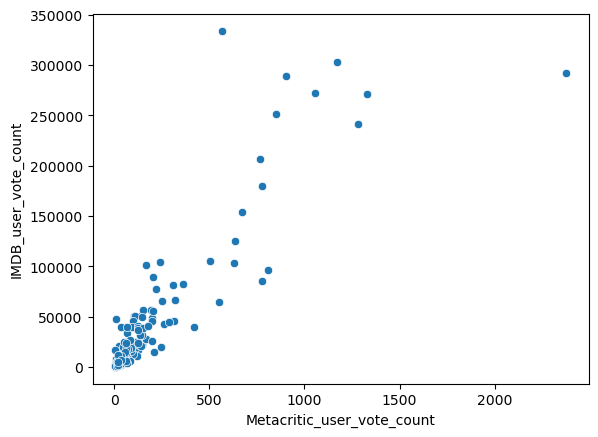

In [44]:
sns.scatterplot(data=sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');

In [45]:
sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [46]:
sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9
